## Week 12 Assignment: Preprocessing Data

- Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing.
- Add meaningful names for each column.
- Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1.
- Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.
- Include some text describing your preliminary conclusions about whether either of the other columns could be helpful in predicting if a specific mushroom is edible or poisonous.

Dataset: https://archive.ics.uci.edu/ml/datasets/Mushroom

#### First, import data and create formatted subset

In [42]:
import pandas as pd

#read in the data dictionary to use for column naming
col = pd.read_csv('https://raw.githubusercontent.com/sarahbill33/dataacq/main/mushroomdatadict.csv', header=None)

#isolate column names
colnames = col.iloc[:,1]
colnames = colnames.str.strip()

#read in mushrooms data
mushrooms = pd.read_csv('https://raw.githubusercontent.com/sarahbill33/dataacq/main/mushroomdata.csv', header=None)

#assign column names from isolated series
mushrooms = mushrooms.rename(columns=colnames)

#create subset for 3 selected columns
mushsub = mushrooms[['edibility', 'odor', 'gill-color']]

#replace alpha characters with numeric using data dictionary mapping
mushsub['edibility'].mask(mushsub['edibility']=='e',0, inplace=True)
mushsub['edibility'].mask(mushsub['edibility']=='p',1, inplace=True)
mushsub['odor'].mask(mushsub['odor']=='a',0, inplace=True)
mushsub['odor'].mask(mushsub['odor']=='l',1, inplace=True)
mushsub['odor'].mask(mushsub['odor']=='c',2, inplace=True)
mushsub['odor'].mask(mushsub['odor']=='y',3, inplace=True)
mushsub['odor'].mask(mushsub['odor']=='f',4, inplace=True)
mushsub['odor'].mask(mushsub['odor']=='m',5, inplace=True)
mushsub['odor'].mask(mushsub['odor']=='n',6, inplace=True)
mushsub['odor'].mask(mushsub['odor']=='p',7, inplace=True)
mushsub['odor'].mask(mushsub['odor']=='s',8, inplace=True)
mushsub['gill-color'].mask(mushsub['gill-color']=='k',0, inplace=True)
mushsub['gill-color'].mask(mushsub['gill-color']=='n',1, inplace=True)
mushsub['gill-color'].mask(mushsub['gill-color']=='b',2, inplace=True)
mushsub['gill-color'].mask(mushsub['gill-color']=='h',3, inplace=True)
mushsub['gill-color'].mask(mushsub['gill-color']=='g',4, inplace=True)
mushsub['gill-color'].mask(mushsub['gill-color']=='r',5, inplace=True)
mushsub['gill-color'].mask(mushsub['gill-color']=='o',6, inplace=True)
mushsub['gill-color'].mask(mushsub['gill-color']=='p',7, inplace=True)
mushsub['gill-color'].mask(mushsub['gill-color']=='u',8, inplace=True)
mushsub['gill-color'].mask(mushsub['gill-color']=='e',9, inplace=True)
mushsub['gill-color'].mask(mushsub['gill-color']=='w',10, inplace=True)
mushsub['gill-color'].mask(mushsub['gill-color']=='y',11, inplace=True)

print(mushsub)


C:\Users\Sarah Bill\AppData\Local\Temp\ipykernel_69308\415363905.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mushsub['edibility'].mask(mushsub['edibility']=='e',0, inplace=True)
C:\Users\Sarah Bill\AppData\Local\Temp\ipykernel_69308\415363905.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mushsub['edibility'].mask(mushsub['edibility']=='p',1, inplace=True)
C:\Users\Sarah Bill\AppData\Local\Temp\ipykernel_69308\415363905.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

     edibility odor gill-color
0            1    7          0
1            0    0          0
2            0    1          1
3            1    7          1
4            0    6          0
...        ...  ...        ...
8119         0    6         11
8120         0    6         11
8121         0    6          1
8122         1    3          2
8123         0    6         11

[8124 rows x 3 columns]


'\nALPHA-TO-NUMERIC MAPPING\n\nedibility: \nedible=e=1,\npoisonous=p=2\n\nodor: \nalmond=a=1,\nanise=l=2,\ncreosote=c=3,\nfishy=y=4,\nfoul=f=5, \nmusty=m=6,\nnone=n=7,\npungent=p=8,\nspicy=s=9\n\ngill-color: \nblack=k=1,\nbrown=n=2,\nbuff=b=3,\nchocolate=h=4,\ngray=g=5, \ngreen=r=6,\norange=o=7,\npink=p=8,\npurple=u=9,\nred=e=10, \nwhite=w=11,\nyellow=y=12\n'

#### Next, do exploratory analysis (distribution, scatterplots)

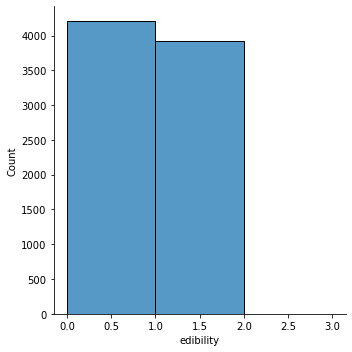

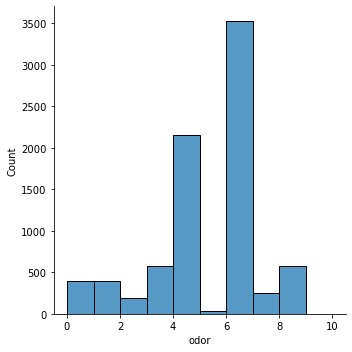

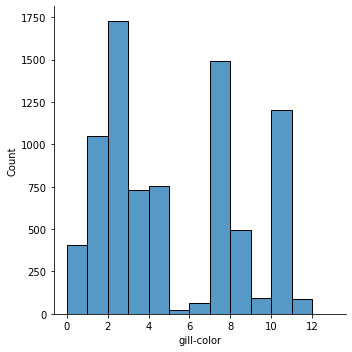

In [43]:
import seaborn as sns

mushsub_ed = mushsub['edibility']
sns.displot(mushsub_ed, bins=[0,1,2,3])

mushsub_od = mushsub['odor']
sns.displot(mushsub_od, bins=[0,1,2,3,4,5,6,7,8,9,10])

mushsub_co = mushsub['gill-color']
sns.displot(mushsub_co, bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])

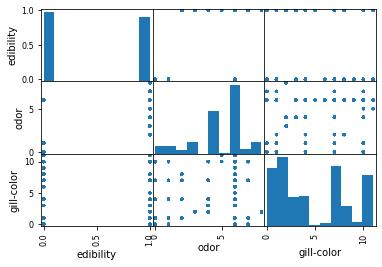

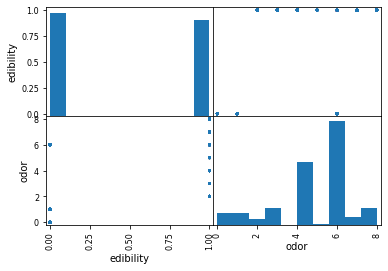

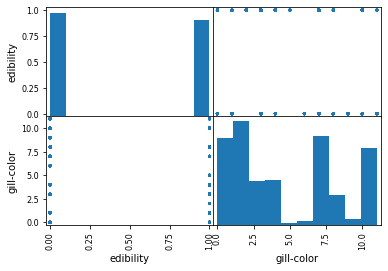

In [69]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


#make sure mushsub is formatted as df with numeric columns
mushsub = pd.DataFrame(mushsub)
mushsub['edibility'] = pd.to_numeric(mushsub['edibility'])
mushsub['odor'] = pd.to_numeric(mushsub['odor'])
mushsub['gill-color'] = pd.to_numeric(mushsub['gill-color'])

mushsub1 = pd.DataFrame(mushsub[['edibility', 'odor']])
mushsub1['edibility'] = pd.to_numeric(mushsub1['edibility'])
mushsub1['odor'] = pd.to_numeric(mushsub1['odor'])

mushsub2 = pd.DataFrame(mushsub[['edibility', 'gill-color']])
mushsub2['edibility'] = pd.to_numeric(mushsub2['edibility'])
mushsub2['gill-color'] = pd.to_numeric(mushsub2['gill-color'])

#plot the scatter matrix
pd.plotting.scatter_matrix(mushsub)
plt.show()

pd.plotting.scatter_matrix(mushsub1)
plt.show()

pd.plotting.scatter_matrix(mushsub2)
plt.show()


#### Preliminary Conclusions

It appears that the following may be true:
- Odors 0 and 1 are generally associated with edible mushrooms
- Odors 2, 3, 4, 5, 7, and 8 are generally associated with poisonous mushrooms
- Gill colors 6 and 9 are generally associated with edible mushrooms
- Gill colors 3 and 5 are generally associated with poisonous mushrooms